In [15]:
import tensorflow as tf 
from tensorflow.keras.applications import VGG16 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten, Dropout 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.datasets import cifar10 
from tensorflow.keras.utils import plot_model 
import matplotlib.pyplot as plt 
import numpy as np 

In [25]:
from tensorflow.keras.datasets import cifar10 
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 
x_train = x_train / 255.0 
x_test = x_test / 255.0 

170498071/170498071 [==============================] - 18s 0us/step


In [17]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [18]:
 for layer in vgg_base.layers: 
    layer.trainable = False 

In [19]:
model = Sequential() 
model.add(vgg_base) 
model.add(Flatten()) 
model.add(Dense(512, activation='relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(10, activation='softmax'))

In [20]:
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']) 

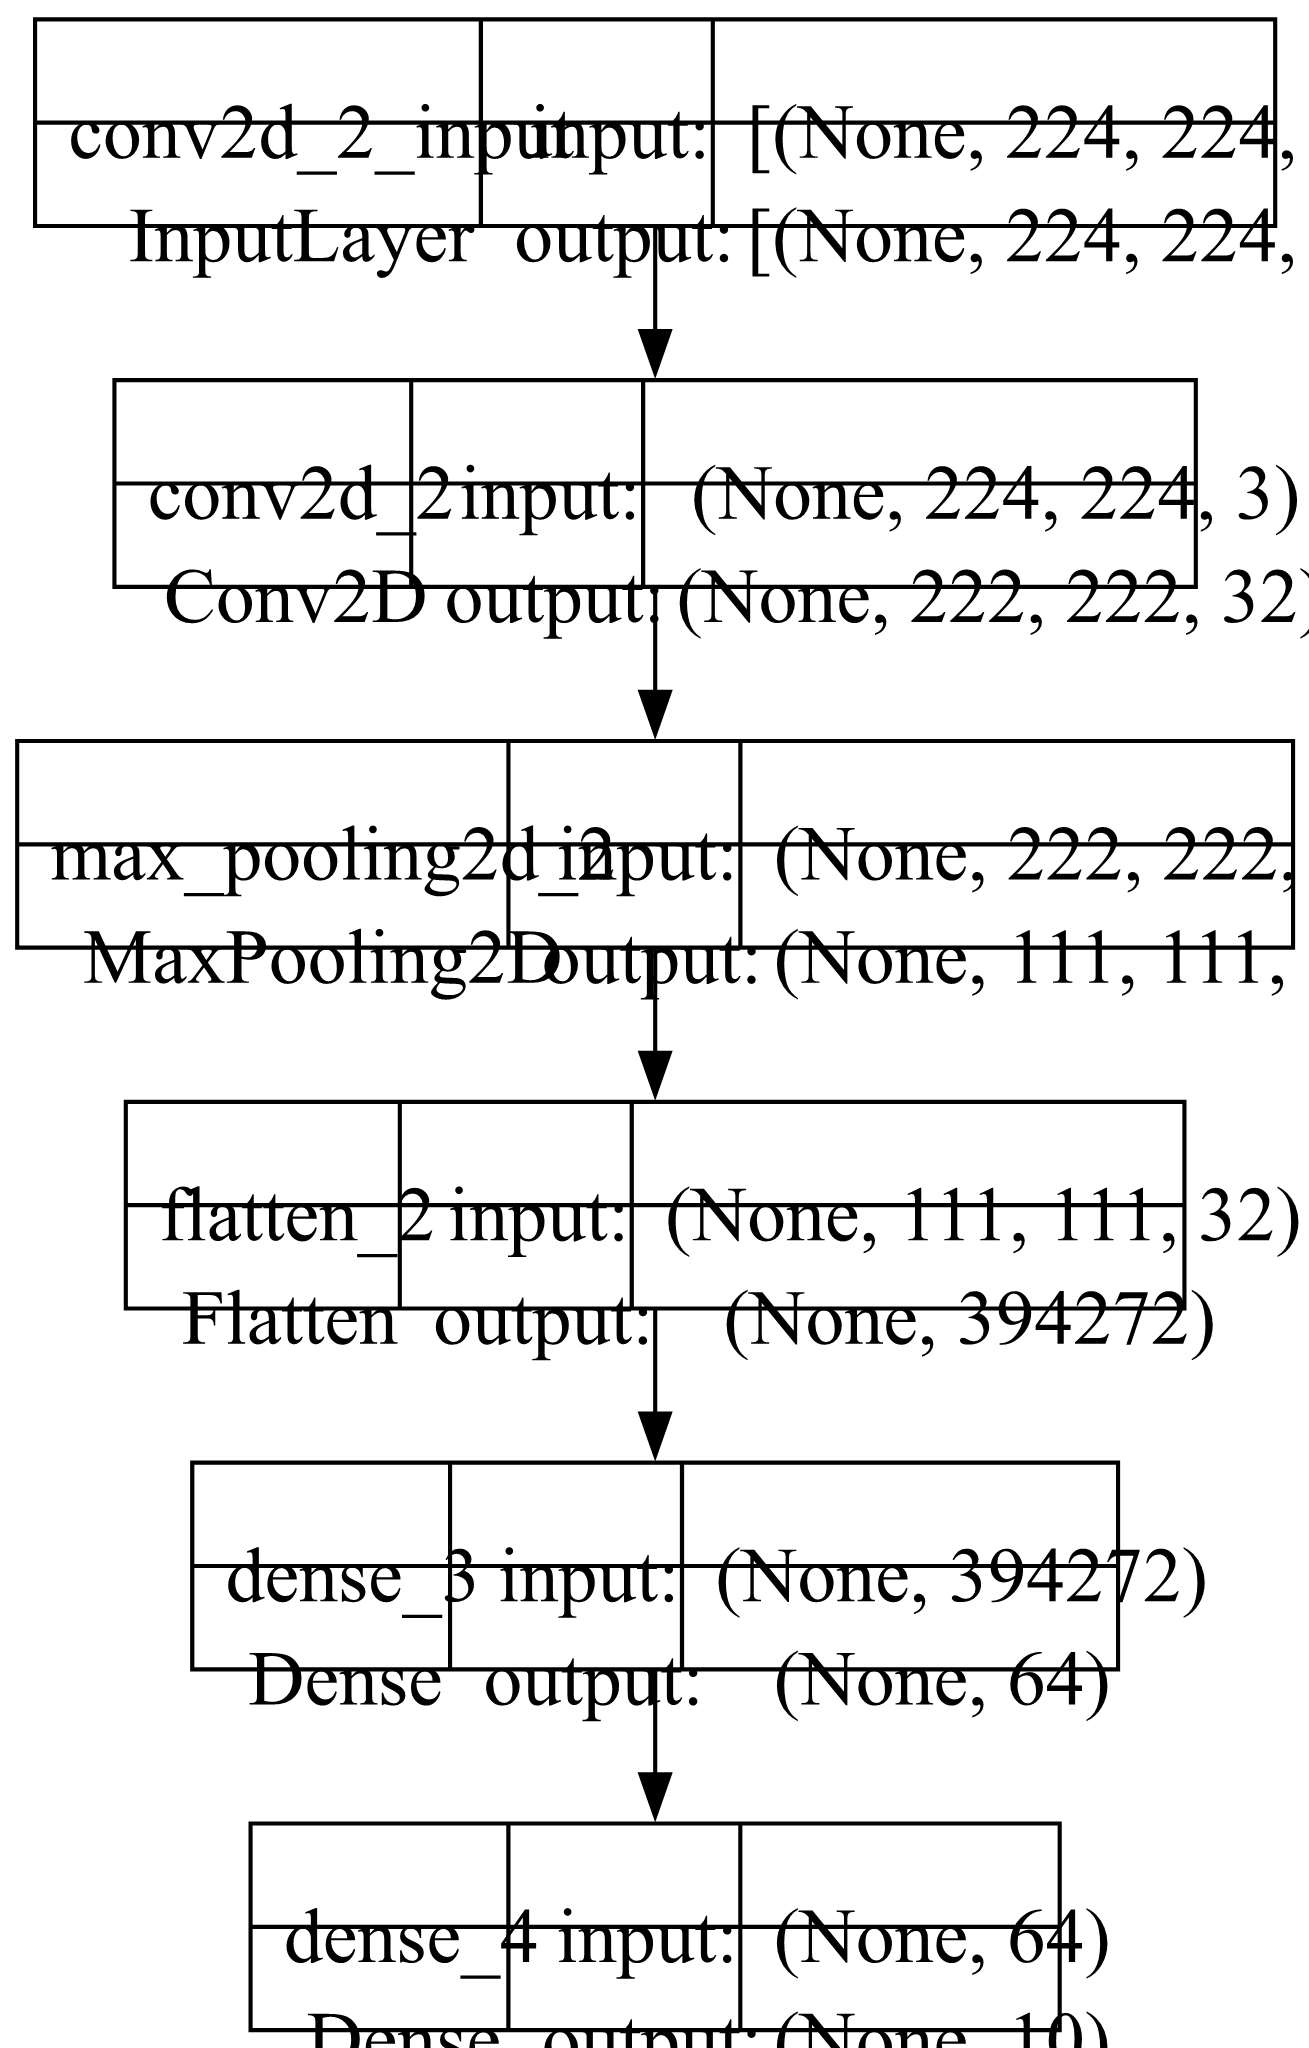

In [21]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cnn.png', show_shapes=True, 
           show_layer_names=True, dpi=300)

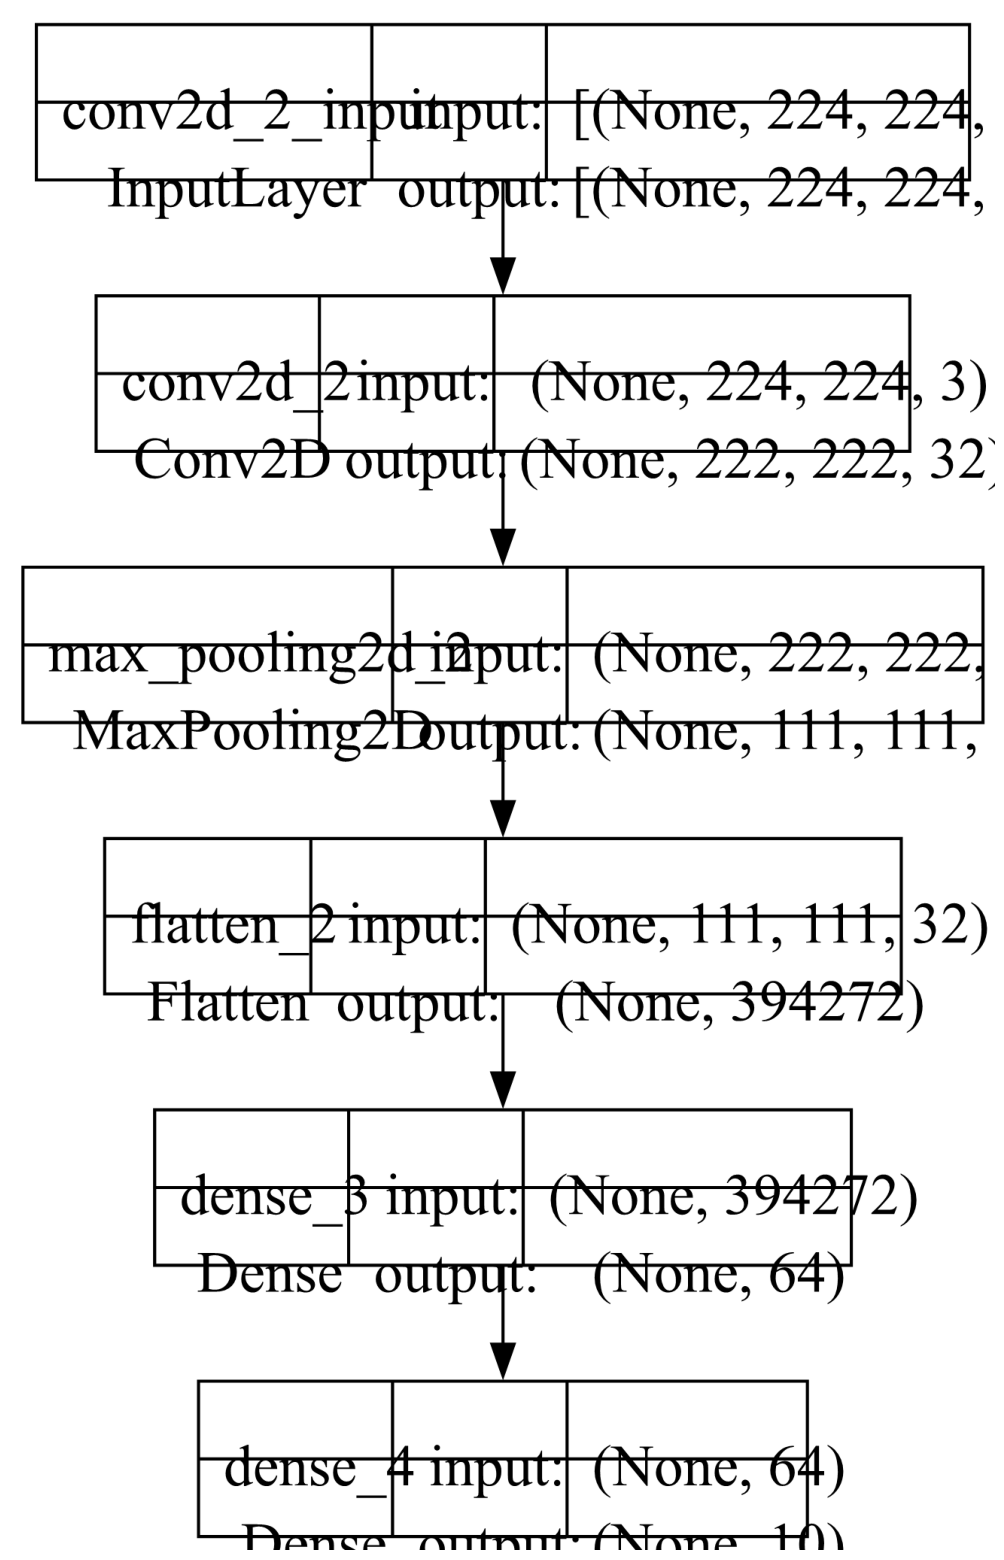

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20)) 
img = plt.imread('cnn.png') 
plt.imshow(img) 
plt.axis('off') 
plt.show() 

In [7]:
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# MNIST images are grayscale (28x28), expand dims to make them 3-channel
x_train = x_train[..., None]  # shape: (60000, 28, 28, 1)
x_test = x_test[..., None]

# Normalize to [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0


In [8]:
from tensorflow.keras.datasets import cifar10

# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize to [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0


In [13]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

def preprocess(img, label):
    img = tf.cast(img, tf.float32) / 255.0   # normalize lazily
    img = tf.image.resize(img, (64,64))      # smaller size than 224x224
    return img, label

# Build datasets
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_ds = train_ds.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)


In [14]:
x_train_small = x_train[:5000]
y_train_small = y_train[:5000]
x_test_small = x_test[:1000]
y_test_small = y_test[:1000]


In [17]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),   # 👈 define input here
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Expand dims -> (28,28,1)
x_train = np.expand_dims(x_train, -1)  
x_test = np.expand_dims(x_test, -1)

# Convert to 3 channels -> (28,28,3)
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)

# Normalize to [0,1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# One-hot encode labels
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9432 - loss: 0.1838 - val_accuracy: 0.9828 - val_loss: 0.0565
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9844 - loss: 0.0502 - val_accuracy: 0.9859 - val_loss: 0.0463
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9887 - loss: 0.0350 - val_accuracy: 0.9892 - val_loss: 0.0382
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9915 - loss: 0.0271 - val_accuracy: 0.9879 - val_loss: 0.0408
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9930 - loss: 0.0220 - val_accuracy: 0.9879 - val_loss: 0.0423
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9881 - loss: 0.0388      
Test accuracy: 0.988099992275238


In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test) 
print(f'Test Loss: {test_loss:.4f}') 
print(f'Test Accuracy: {test_acc * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9855 - loss: 0.0456 
Test Loss: 0.0456
Test Accuracy: 98.55%


In [8]:
import matplotlib.pyplot as plt


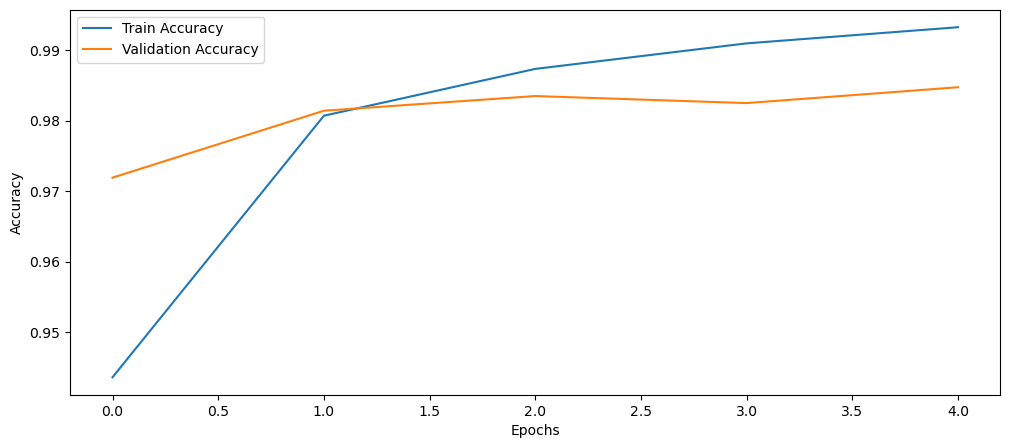

In [9]:

 plt.figure(figsize=(12, 5))

# Example: plot training vs validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


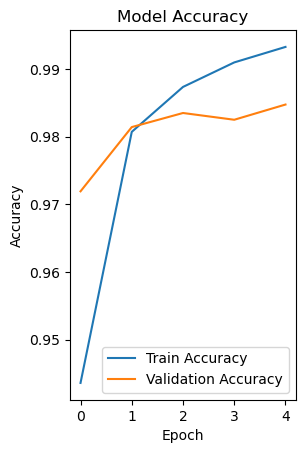

In [10]:
plt.subplot(1, 2, 1) 
plt.plot(history.history['accuracy'], label='Train Accuracy') 
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') 
plt.title('Model Accuracy') 
plt.xlabel('Epoch') 
plt.ylabel('Accuracy') 
plt.legend()

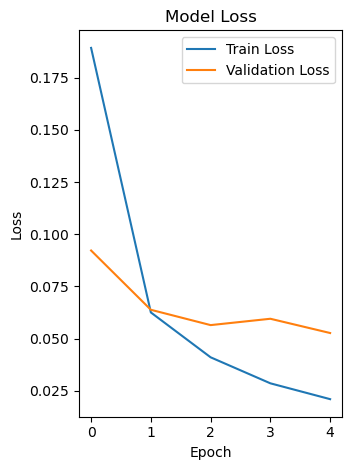

In [11]:
plt.subplot(1, 2, 2) 
plt.plot(history.history['loss'], label='Train Loss') 
plt.plot(history.history['val_loss'], label='Validation Loss') 
plt.title('Model Loss') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend() 
plt.tight_layout() 
plt.show() 

In [19]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
'dog', 'frog', 'horse', 'ship', 'truck']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Predicted class: bird


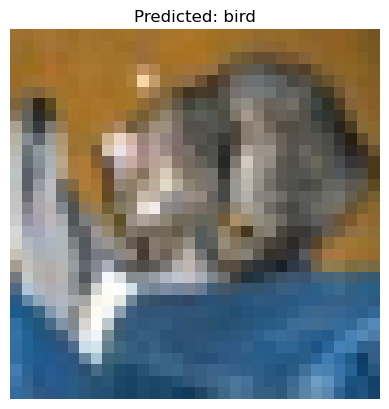

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Resize from 32x32x3 to 28x28x3
sample = tf.image.resize(x_test[0], (28, 28))  # shape (28,28,3)
sample = np.expand_dims(sample, axis=0)        # shape (1,28,28,3)

# Predict
prediction = model.predict(sample)
predicted_class = np.argmax(prediction)

print("Predicted class:", class_names[predicted_class])

# Plot
plt.imshow(x_test[0])  # original image
plt.title(f"Predicted: {class_names[predicted_class]}")
plt.axis("off")
plt.show()
